In [1]:
suppressMessages({library(Seurat) 
library(SeuratData)
library(Signac)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(cowplot)
library(GenomeInfoDb)
library(stringr)
library(patchwork)
library(SeuratDisk)
library(dplyr)})

In [62]:
results_dir = "../../../results/Fig7-Granja_BMMC_scATAC/Fig7-apply_seurat_label_transfer/"
figures_dir = "../../../results/Fig7-Granja_BMMC_scATAC/Fig7-apply_seurat_label_transfer/figures/"

### read the scATAC-seq data

In [3]:
counts <- Matrix::readMM("../../../data/Granja2019/BMMC_D6T1/05_peaks_and_genesScore_matrix_ArchR/input_for_EpiAnno/ArchR_peakMatrix.mtx")
peaks <- read.table("../../..//data/Granja2019/BMMC_D6T1/05_peaks_and_genesScore_matrix_ArchR/input_for_EpiAnno/ArchR_peaks.tsv",sep="\t")
barcodes_df = read.table("../../..//data/Granja2019/BMMC_D6T1/05_peaks_and_genesScore_matrix_ArchR/ArchR_genescore_barcodes.tsv", sep="\t",  stringsAsFactors = TRUE,comment.char="")
barcodes_ =str_split_fixed(barcodes_df$V1, "#", 2)
barcodes <- as.data.frame(barcodes_)$V2
peaknames <- peaks$V1
colnames(counts) <- barcodes
rownames(counts) <- peaknames


In [4]:
chrom_assay <- CreateChromatinAssay(
  counts = counts,
  sep = c(":", "_"),
  fragments = '../../../data/Granja2019/BMMC_D6T1/01_prepare_fragments_file/final_fragment_files/GSM4138889_scATAC_BMMC_D6T1_liftOverhg38_no_chrMt_sorted_fragments.tsv.gz',
  min.cells = 10,
  min.features = 200
)

bmmc.atac <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks"
)

Computing hash

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"


#### ATAC analysis

In [5]:
# get gene annotations for hg38
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)
seqlevels(annotation) <- paste0('chr', seqlevels(annotation))

Warning message:
"no function found corresponding to methods exports from 'BSgenome' for: 'releaseName'"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .Seqinfo.mergexy(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppre

In [6]:
genome(annotation) <- "hg38"
Annotation(bmmc.atac) <- annotation

In [9]:
bmmc.atac <- NucleosomeSignal(bmmc.atac)
bmmc.atac <- TSSEnrichment(bmmc.atac)



Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



In [14]:
bmmc.atac$TSS.enrichment

TTGCCCATCGTCTTAT-1 AAGATAGTCACCGCGA-1 GAGGTCCAGCTACGTT-1 TACATTCTCGATAGCT-1 
          2.600939           3.813497           2.887701           5.004472 
TGGTCCTGTATCTGCA-1 TATGTTCAGGGTTCCC-1 GTTGGTAAGAGGTACC-1 TCCATCGGTCCCGTGA-1 
          3.692178           3.277395           3.508256           2.461838 
TTACCCGTCTCATATC-1 AGTTACGAGAACGTCG-1 TTACTCAGTTCGGGAA-1 GTTATGGCAACTAGAA-1 
          2.489918           3.576846           4.582126           3.422539 
GGATAGGAGTCAGGAC-1 TGTAGCAGTCACTCTC-1 GAGCATTTCAAACCAC-1 TCACTCGCAGAATGCG-1 
          2.367614           3.346219           4.422030           3.770604 
GTAGGAGCATTATGGC-1 TCGCCTAGTACGAGAC-1 TAGCGGCAGGAACCGT-1 CCGTACTCAAGTGGCA-1 
          3.549236           4.403610           4.016418           3.518007 
GACTAGTGTGATAAGT-1 TTACCGCAGGTTCGTT-1 CGGACCACAGCGTACC-1 CCCACATGTCTCGGGT-1 
          5.066130           2.854892           4.590690           3.784856 
GCTCACTTCCAACAAC-1 CGGACCATCATACTTC-1 TGGGTGCAGTAGGAAG-1 CTCAGCTAGCGTAGCA-1 
          4.732392           3.485509           3.809860           3.786410 
AGCGATTCATTCACCC-1 AAACTCGCAAATGCTC-1 ATGTCTTAGCATTCCA-1 TTGCACCCACACATTG-1 
          3.553090           3.580679           3.657261           4.426849 
TCCCACATCGCTACCT-1 TTATGTCCACCACAGC-1 GGAGAACTCCATAGGT-1 GCTGTTCAGATGTTCC-1 
          3.346196           4.337136           3.713647           3.749409 
GCGTTGGCAGGTGGTA-1 GGAATCTAGCCCATTA-1 GACCTTCCATAGCCAT-1 TGTAAGCGTTTGACCA-1 
          3.616495           3.384623           4.950455           4.358218 
GCGGAAACACTCGGAC-1 CCCTAACAGTCTCTAG-1 TACAGCAGTGGCGCTT-1 GCTTAAGAGCAATGTA-1 
          3.685306           3.487834           3.285346           3.297780 
CACAACAGTGCTTTGA-1 GTTGGTATCTCAGATG-1 CGTACAAAGGCCTAAG-1 GCATTGAAGATGAGGA-1 
          2.455083           3.618061           3.104258           3.440310 
GCTTGCTCAACAAACA-1 AACTTGGAGTACTCTG-1 AGACAAACAGTAACTC-1 GAGGTCCCAGCCACGT-1 
          3.684947           2.905547           2.730448           3.193346 
TGCCTCACAATCATCG-1 TAACTTCGTTCCCAAA-1 AGGACGAAGAATCAAC-1 TTATGTCAGGATTGCG-1 
          3.835295           3.707853           3.046323           3.381401 
AAGGAGCCAGTAACTC-1 TTCTGTATCTGAACGT-1 CCCTAGTCACCCTTTG-1 AGCCTGGTCCCAGCGA-1 
          4.331259           3.243328           3.950406           3.269362 
ATAGGCTTCATTCTTG-1 TCGCCTACAACGCACC-1 ACAATCGTCGTGTGCG-1 TGGACATCAAGGTTCT-1 
          4.722550           3.138254           3.503213           3.913435 
GTTGGGCAGGCCTCTG-1 GTTCAAGAGGTACACG-1 ATTCGTTCAGCGTACC-1 TTAACGGTCACTCGGG-1 
          4.350946           5.160502           5.103320           3.716284 
ACTAGGTTCCTAAGTG-1 TAGTCCCAGACCAATA-1 GTTCAAGTCGTTGTTT-1 ATTTGTCTCAGGAATA-1 
          3.569944           3.398026           3.070304           3.933742 
ACGTGGCTCCATAACG-1 GAAAGTAAGCACGTAG-1 GAAACAATCTTAAGCG-1 GTGGATTAGCAGAGCT-1 
          3.395285           3.893230           4.189983           3.841424 
CTAACTTCAATGGCTT-1 TAGCCCTCAACACGGA-1 GGCACGTCATCCATAG-1 GATCATGGTACCCACG-1 
          3.964838           3.787765           4.383502           4.186439 
GCGGAAAAGGCCTCTG-1 GATGATCAGAACTCCT-1 TGTAAGCGTATCTGCA-1 GATTGACCACTAAACC-1 
          3.792116           3.551519           5.064058           4.025631 
CTTAATCAGATCTAAG-1 ACAAGCTTCAGTCAAC-1 GTGGCGTGTGCCCTAG-1 GGGCCATTCACAAGCT-1 
          3.994288           4.156248           4.056869           3.361254 
TTTGGCCTCCTCCTGA-1 TCAAAGCGTATGAAGT-1 ACCGCAGTCGTGGCGT-1 CCCTAACTCCGTGCGA-1 
          3.851306           3.837868           4.534911           3.159389 
AGCCTTCGTAAACGGC-1 GATTAGCCACCATTCC-1 CTAGGATTCTATGAGC-1 ATAGGCTTCAATTCCT-1 
          2.170293           3.535746           2.971136           4.145918 
AGGACGAGTCTGATTG-1 ATGTCGAGTGAATGGC-1 TCAAGACTCTCCCTTT-1 TGTGGCGGTCTAAGAA-1 
          4.165729           2.962117           4.131238           3.770279 
TCACAGATCGATCTTT-1 TGCACCTAGAAATACC-1 ACGTTAGGTGAGTCGA-1 TAGCGGCCACTGAAGG-1 
          3.737576           4.228030           2.543403           4.2676

In [15]:
bmmc.atac$high.tss


TTGCCCATCGTCTTAT-1 AAGATAGTCACCGCGA-1 GAGGTCCAGCTACGTT-1 TACATTCTCGATAGCT-1 
             "Low"             "High"              "Low"             "High" 
TGGTCCTGTATCTGCA-1 TATGTTCAGGGTTCCC-1 GTTGGTAAGAGGTACC-1 TCCATCGGTCCCGTGA-1 
            "High"             "High"             "High"              "Low" 
TTACCCGTCTCATATC-1 AGTTACGAGAACGTCG-1 TTACTCAGTTCGGGAA-1 GTTATGGCAACTAGAA-1 
             "Low"             "High"             "High"             "High" 
GGATAGGAGTCAGGAC-1 TGTAGCAGTCACTCTC-1 GAGCATTTCAAACCAC-1 TCACTCGCAGAATGCG-1 
             "Low"             "High"             "High"             "High" 
GTAGGAGCATTATGGC-1 TCGCCTAGTACGAGAC-1 TAGCGGCAGGAACCGT-1 CCGTACTCAAGTGGCA-1 
            "High"             "High"             "High"             "High" 
GACTAGTGTGATAAGT-1 TTACCGCAGGTTCGTT-1 CGGACCACAGCGTACC-1 CCCACATGTCTCGGGT-1 
            "High"              "Low"             "High"             "High" 
GCTCACTTCCAACAAC-1 CGGACCATCATACTTC-1 TGGGTGCAGTAGGAAG-1 CTCAGCTAGCGTAGCA-1 
            "High"             "High"             "High"             "High" 
AGCGATTCATTCACCC-1 AAACTCGCAAATGCTC-1 ATGTCTTAGCATTCCA-1 TTGCACCCACACATTG-1 
            "High"             "High"             "High"             "High" 
TCCCACATCGCTACCT-1 TTATGTCCACCACAGC-1 GGAGAACTCCATAGGT-1 GCTGTTCAGATGTTCC-1 
            "High"             "High"             "High"             "High" 
GCGTTGGCAGGTGGTA-1 GGAATCTAGCCCATTA-1 GACCTTCCATAGCCAT-1 TGTAAGCGTTTGACCA-1 
            "High"             "High"             "High"             "High" 
GCGGAAACACTCGGAC-1 CCCTAACAGTCTCTAG-1 TACAGCAGTGGCGCTT-1 GCTTAAGAGCAATGTA-1 
            "High"             "High"             "High"             "High" 
CACAACAGTGCTTTGA-1 GTTGGTATCTCAGATG-1 CGTACAAAGGCCTAAG-1 GCATTGAAGATGAGGA-1 
             "Low"             "High"             "High"             "High" 
GCTTGCTCAACAAACA-1 AACTTGGAGTACTCTG-1 AGACAAACAGTAACTC-1 GAGGTCCCAGCCACGT-1 
            "High"              "Low"              "Low"             "High" 
TGCCTCACAATCATCG-1 TAACTTCGTTCCCAAA-1 AGGACGAAGAATCAAC-1 TTATGTCAGGATTGCG-1 
            "High"             "High"             "High"             "High" 
AAGGAGCCAGTAACTC-1 TTCTGTATCTGAACGT-1 CCCTAGTCACCCTTTG-1 AGCCTGGTCCCAGCGA-1 
            "High"             "High"             "High"             "High" 
ATAGGCTTCATTCTTG-1 TCGCCTACAACGCACC-1 ACAATCGTCGTGTGCG-1 TGGACATCAAGGTTCT-1 
            "High"             "High"             "High"             "High" 
GTTGGGCAGGCCTCTG-1 GTTCAAGAGGTACACG-1 ATTCGTTCAGCGTACC-1 TTAACGGTCACTCGGG-1 
            "High"             "High"             "High"             "High" 
ACTAGGTTCCTAAGTG-1 TAGTCCCAGACCAATA-1 GTTCAAGTCGTTGTTT-1 ATTTGTCTCAGGAATA-1 
            "High"             "High"             "High"             "High" 
ACGTGGCTCCATAACG-1 GAAAGTAAGCACGTAG-1 GAAACAATCTTAAGCG-1 GTGGATTAGCAGAGCT-1 
            "High"             "High"             "High"             "High" 
CTAACTTCAATGGCTT-1 TAGCCCTCAACACGGA-1 GGCACGTCATCCATAG-1 GATCATGGTACCCACG-1 
            "High"             "High"             "High"             "High" 
GCGGAAAAGGCCTCTG-1 GATGATCAGAACTCCT-1 TGTAAGCGTATCTGCA-1 GATTGACCACTAAACC-1 
            "High"             "High"             "High"             "High" 
CTTAATCAGATCTAAG-1 ACAAGCTTCAGTCAAC-1 GTGGCGTGTGCCCTAG-1 GGGCCATTCACAAGCT-1 
            "High"             "High"             "High"             "High" 
TTTGGCCTCCTCCTGA-1 TCAAAGCGTATGAAGT-1 ACCGCAGTCGTGGCGT-1 CCCTAACTCCGTGCGA-1 
            "High"             "High"             "High"             "High" 
AGCCTTCGTAAACGGC-1 GATTAGCCACCATTCC-1 CTAGGATTCTATGAGC-1 ATAGGCTTCAATTCCT-1 
             "Low"             "High"              "Low"             "High" 
AGGACGAGTCTGATTG-1 ATGTCGAGTGAATGGC-1 TCAAGACTCTCCCTTT-1 TGTGGCGGTCTAAGAA-1 
            "High"              "Low"             "High"             "High" 
TCACAGATCGATCTTT-1 TGCACCTAGAAATACC-1 ACGTTAGGTGAGTCGA-1 TAGCGGCCACTGAAGG-1 
            "High"             "High"              "Low"             "Hig

In [ ]:
bmmc.atac$nucleosome_group <- ifelse(bmmc.atac$nucleosome_signal > 4, 'NS > 4', 'NS < 4')
FragmentHistogram(object = bmmc.atac, group.by = 'nucleosome_group')

In [ ]:
VlnPlot(
  object = bmmc.atac,
  features = c('nCount_peaks', 'TSS.enrichment', 'blacklist_ratio', 'nucleosome_signal', 'pct_reads_in_peaks'),
  pt.size = 0.1,
  ncol = 
)

Warning message in FetchData.Seurat(object = object, vars = features, slot = slot):
"The following requested variables were not found: blacklist_ratio, pct_reads_in_peaks"


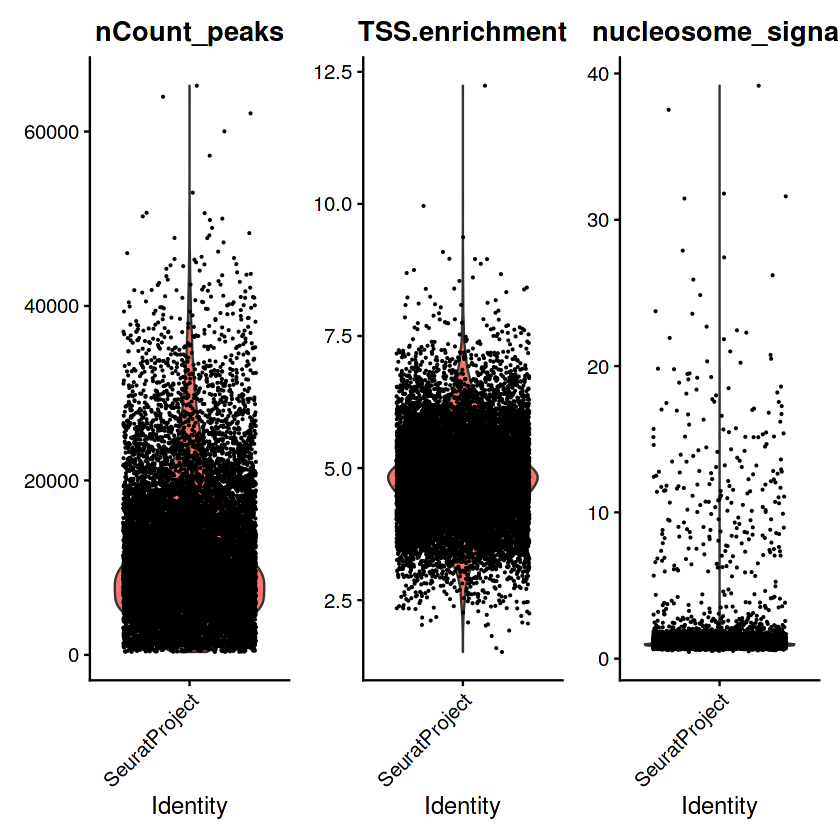

In [19]:
VlnPlot(
  object = bmmc.atac,
  features = c('nCount_peaks', 'TSS.enrichment', 'blacklist_ratio', 'nucleosome_signal', 'pct_reads_in_peaks'),
  pt.size = 0.1,
  ncol = 3
)

In [21]:
bmmc.atac

An object of class Seurat 
196038 features across 13491 samples within 1 assay 
Active assay: peaks (196038 features, 0 variable features)

In [22]:
bmmc.atac <- subset(
  x = bmmc.atac,
  subset = nCount_peaks > 3000 &
    nCount_peaks < 30000 &
    nucleosome_signal < 4 &
    TSS.enrichment > 3
)
bmmc.atac

An object of class Seurat 
196038 features across 11820 samples within 1 assay 
Active assay: peaks (196038 features, 0 variable features)

In [23]:
#pbmc.atac@assayse first dimension as this is typically correlated with sequencing depth
bmmc.atac <- RunTFIDF(bmmc.atac)
bmmc.atac <- FindTopFeatures(bmmc.atac, min.cutoff = "q0")
bmmc.atac <- RunSVD(bmmc.atac)
bmmc.atac <- RunUMAP(bmmc.atac, reduction = "lsi", dims = 2:30, reduction.name = "umap.atac", reduction.key = "atacUMAP_")


Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
14:17:02 UMAP embedding parameters a = 0.9922 b = 1.112

14:17:02 Read 11820 rows and found 29 numeric columns

14:17:02 Using Annoy for neighbor search, n_neighbors = 30

14:17:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:17:04 Writing NN index file to temp file /scratch/local/Rtmp8i27qY/file2564eb740b2

14:17:04 Searching Annoy index using 1 thread, search_k = 3000

14:17:08 Annoy recall = 100%

14:17:09 Com

In [24]:
## quantify gene activity
gene.activities <- GeneActivity(bmmc.atac)

# add gene activities as a new assay
bmmc.atac[["ACTIVITY"]] <- CreateAssayObject(counts = gene.activities)

# normalize gene activities
DefaultAssay(bmmc.atac) <- "ACTIVITY"
bmmc.atac <- NormalizeData(bmmc.atac)
bmmc.atac <- ScaleData(bmmc.atac, features = rownames(bmmc.atac))


Extracting gene coordinates

Extracting reads overlapping genomic regions

Centering and scaling data matrix



## ANNOTATION VIA REFERENCE 

- Annotations for scATAc-seq data is done via log transformed array


In [25]:
#load reference data
#InstallData("bmcite")
bm_ref <- LoadData(ds = "bmcite")
#load query data

UMAP will return its model

14:25:42 UMAP embedding parameters a = 0.9922 b = 1.112

14:25:44 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 20

14:25:45 Initializing from normalized Laplacian + noise (using irlba)

14:25:47 Commencing optimization for 200 epochs, with 983596 positive edges

14:26:04 Optimization finished

14:26:04 Note: model requested with precomputed neighbors. For transforming new data, distance data must be provided separately



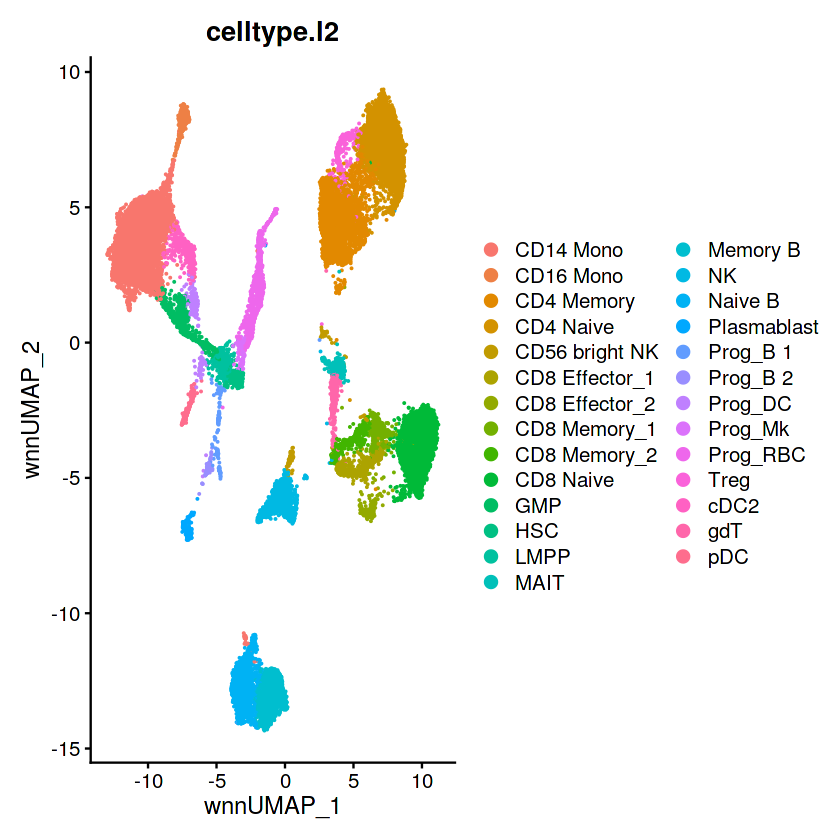

In [26]:
bm_ref <- RunUMAP(bm_ref, nn.name = "weighted.nn", reduction.name = "wnn.umap", 
              reduction.key = "wnnUMAP_", return.model = TRUE)
DimPlot(bm_ref, group.by = "celltype.l2", reduction = "wnn.umap") 

In [27]:
bm_ref <- ScaleData(bm_ref, assay = 'RNA')
bm_ref <- RunSPCA(bm_ref, assay = 'RNA', graph = 'wsnn')

Centering and scaling data matrix

Computing sPCA transformation



### as per the guidelines, both the refernece and the query should have the same normalization method applied for label trasfer. As gene.activity matrix can only have log transformation, we should apply the same for the reference as well.

In [28]:
bm_ref

An object of class Seurat 
17034 features across 30672 samples within 2 assays 
Active assay: RNA (17009 features, 2000 variable features)
 1 other assay present: ADT
 2 dimensional reductions calculated: spca, wnn.umap

In [29]:
bm_ref_logTransformedRNA <- CreateAssayObject(counts = bm_ref@assays$RNA@counts)

In [30]:
bm_ref[["logTransformedRNA"]] <- bm_ref_logTransformedRNA

In [31]:
DefaultAssay(bm_ref) <- "logTransformedRNA"

In [32]:
bm_ref

An object of class Seurat 
34043 features across 30672 samples within 3 assays 
Active assay: logTransformedRNA (17009 features, 0 variable features)
 2 other assays present: RNA, ADT
 2 dimensional reductions calculated: spca, wnn.umap

In [33]:
bm_ref <- NormalizeData(
  bm_ref,
  normalization.method = "LogNormalize")

In [34]:
bm_ref@assays$logTransformedRNA

Assay data with 17009 features for 30672 cells
First 10 features:
 FO538757.2, AP006222.2, RP4-669L17.10, RP11-206L10.9, LINC00115,
FAM41C, SAMD11, NOC2L, KLHL17, PLEKHN1 

In [35]:
bm_ref <- FindVariableFeatures(bm_ref)
bm_ref <- ScaleData(bm_ref)
bm_ref <- RunPCA(bm_ref)
bm_ref <- RunUMAP(bm_ref, dims = 1:30)


Centering and scaling data matrix

PC_ 1 
Positive:  TRBC1, LAT, CD8B, CCL5, KLRB1, IGKC, S100A12, GZMA, S100A8, S100A9 
	   MS4A1, S100B, GNLY, CST7, TYROBP, KLRD1, RP11-291B21.2, NKG7, VCAN, CD14 
	   IGLC2, CCL4, AC092580.4, FCN1, IGLC3, PRF1, RBP7, SERPINA1, DUSP2, JUN 
Negative:  KIAA0101, TYMS, KLF1, KCNH2, FAM178B, APOC1, CNRIP1, CENPU, GATA1, BIRC5 
	   CENPF, EPCAM, CKS2, RP11-620J15.3, TUBA1B, TFR2, CA1, HMGA1, STMN1, HIST1H4C 
	   CDT1, AHSP, TOP2A, TK1, GFI1B, TUBB, MKI67, NME4, SMIM1, TMEM56 
PC_ 2 
Positive:  RPL3, RPS3, RPS18, RPS5, RPS4X, RPSA, RPS12, RPS23, RPS2, EEF1B2 
	   RPL4, LDHB, NPM1, RPS17, RPLP0, TRBC1, LAT, RPL7A, GYPC, HSPA8 
	   CD8B, KLRB1, CCL5, HNRNPA1, PEBP1, RPL37A, MYC, NUCB2, SOD1, CD79A 
Negative:  LYZ, FCN1, CST3, TYROBP, S100A9, LST1, S100A8, CSTA, MNDA, VCAN 
	   LGALS1, AIF1, S100A12, CFD, SERPINA1, FCER1G, MS4A6A, FOS, S100A6, CD14 
	   LGALS2, FTH1, GAPDH, ANXA2, CD36, CPVL, RBP7, HLA-DRA, LINC01272, H3F3A 
PC_ 3 
Positive:  CD74, HLA-DRA, HL

In [36]:
bm_ref <- RunSPCA(bm_ref, reduction.key = "SPC_logTr_", assay = 'logTransformedRNA', graph = 'wsnn')


Computing sPCA transformation

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from SPC_logTr_ to SPClogTr_"
Warning message:
"All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to SPClogTr_"


In [37]:
bm_ref

An object of class Seurat 
34043 features across 30672 samples within 3 assays 
Active assay: logTransformedRNA (17009 features, 2000 variable features)
 2 other assays present: RNA, ADT
 4 dimensional reductions calculated: spca, wnn.umap, pca, umap

In [38]:
bm_ref <- FindNeighbors(
  object = bm_ref,
  reduction = "spca",
  dims = 1:50,
  graph.name = "spca.annoy.neighbors", 
  k.param = 50,
  cache.index = TRUE,
  return.neighbor = TRUE,
  l2.norm = TRUE
)

Computing nearest neighbors

Only one graph name supplied, storing nearest-neighbor graph only



In [39]:
bm_ref

An object of class Seurat 
34043 features across 30672 samples within 3 assays 
Active assay: logTransformedRNA (17009 features, 2000 variable features)
 2 other assays present: RNA, ADT
 4 dimensional reductions calculated: spca, wnn.umap, pca, umap

In [40]:
bm_ref <- RunUMAP(bm_ref, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")


14:31:14 UMAP embedding parameters a = 0.9922 b = 1.112

14:31:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 20

14:31:19 Initializing from normalized Laplacian + noise (using irlba)

14:31:21 Commencing optimization for 200 epochs, with 983596 positive edges

14:31:37 Optimization finished



In [41]:
bm_ref <- FindClusters(bm_ref, graph.name = "wsnn", algorithm = 3, resolution = 2, verbose = FALSE)

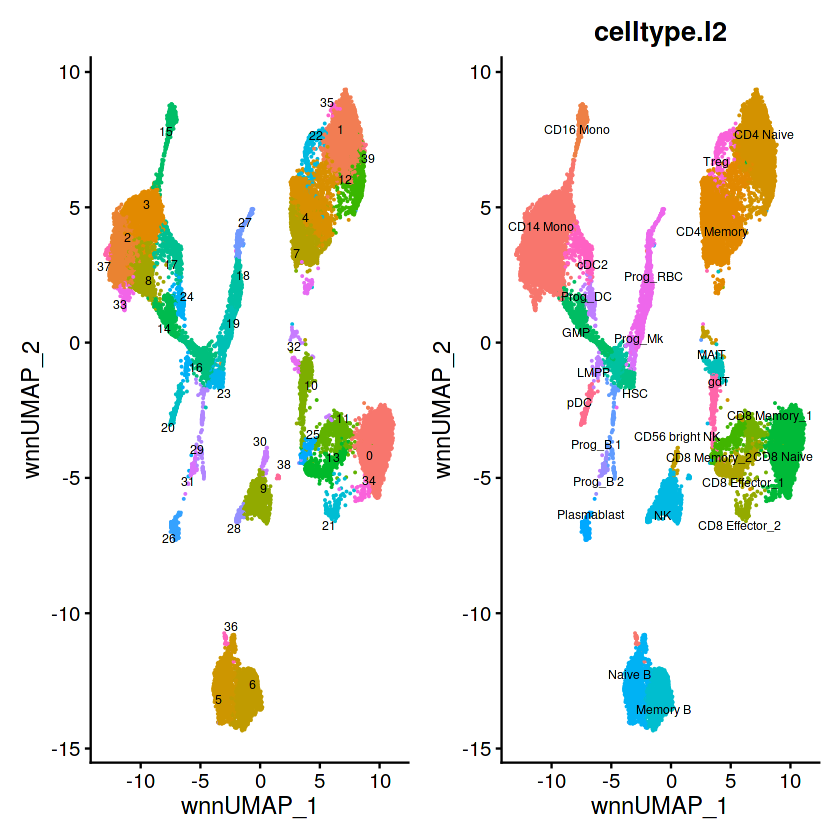

In [42]:
p1 <- DimPlot(bm_ref, reduction = 'wnn.umap', label = TRUE, repel = TRUE, label.size = 2.5) + NoLegend()
p2 <- DimPlot(bm_ref, reduction = 'wnn.umap', group.by = 'celltype.l2', label = TRUE, repel = TRUE, label.size = 2.5) + NoLegend()
p1 + p2

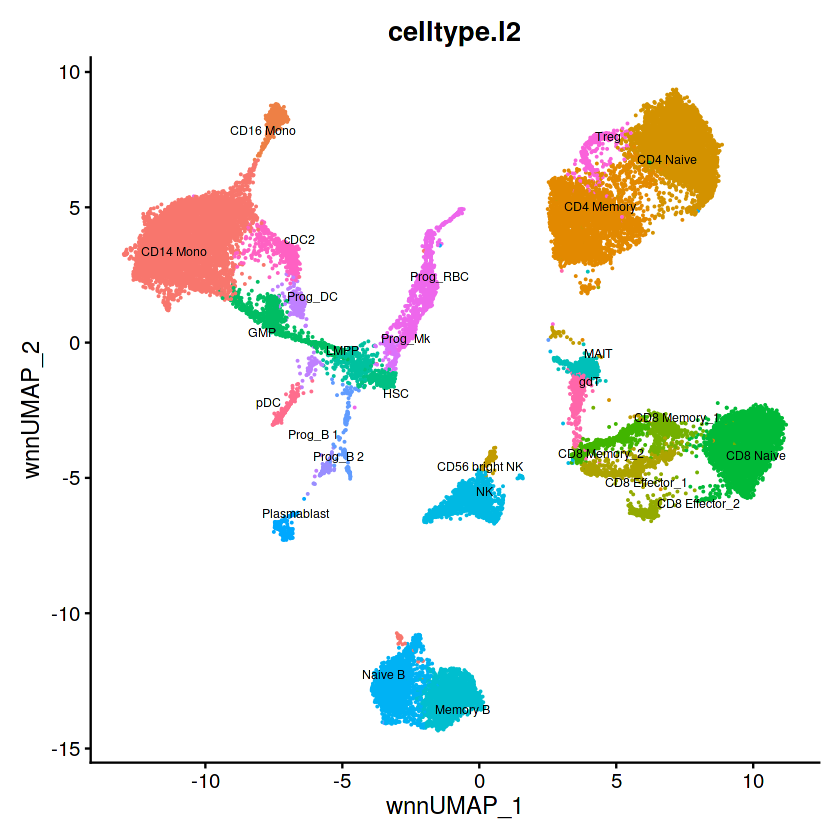

In [43]:
DimPlot(bm_ref, reduction = 'wnn.umap', group.by = 'celltype.l2', label = TRUE, repel = TRUE, label.size = 2.5) + NoLegend()


## label transfer

In [44]:
anchors <- FindTransferAnchors(
    reference = bm_ref,
    query = bmmc.atac,
    k.filter = NA,
    reference.reduction = "spca", 
    reference.neighbors = "spca.annoy.neighbors", 
    dims = 1:50,
    reference.assay = 'logTransformedRNA'
  )


Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 453 anchors



### through the standard pipeline we retained only a small number of anchors, so we will try with cca now..
#### we need variable regions for the query for CCA

In [45]:
bmmc.atac <- FindVariableFeatures(bmmc.atac, selection.method = "vst", nfeatures = 3000)

In [46]:
bmmc.atac

An object of class Seurat 
215645 features across 11820 samples within 2 assays 
Active assay: ACTIVITY (19607 features, 3000 variable features)
 1 other assay present: peaks
 2 dimensional reductions calculated: lsi, umap.atac

In [48]:
bm.cca.anchors <- FindTransferAnchors(reference = bm_ref, query = bmmc.atac, reduction = 'cca', dims = 1:30, 
                               reference.assay = 'logTransformedRNA', query.assay = 'ACTIVITY', normalization.method = 'LogNormalize')


Warning message in RunCCA.Seurat(object1 = reference, object2 = query, features = features, :
"Running CCA on different assays"
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 38124 anchors

Filtering anchors

	Retained 4063 anchors



In [49]:
bm.cca.anchors

An AnchorSet object containing 4063 anchors between the reference and query Seurat objects. 
 This can be used as input to TransferData.

In [50]:
bmmc.atac <- TransferData(
  anchorset = bm.cca.anchors, 
  reference = bm_ref,
  query = bmmc.atac,
  refdata = list(
    celltype.l1 = "celltype.l1",
    celltype.l2 = "celltype.l2",
    predicted_ADT = "ADT"),
    weight.reduction = 'cca'
)

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictionscorecelltype.l1_ to predictionscorecelltypel1_"
Predicting cell labels

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictionscorecelltype.l2_ to predictionscorecelltypel2_"
Transfering 25 features onto reference data

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from predicted_ADT_ to predictedADT_"


In [51]:
bmmc.atac <- IntegrateEmbeddings(
  anchorset = bm.cca.anchors,
  reference = bm_ref,
  query = bmmc.atac, 
  new.reduction.name = "ref.cca",
  reductions = "cca",
)


Integrating dataset 2 with reference dataset

Finding integration vectors

Integrating data



## export resulting annotations

In [55]:
atac_predictions = data.frame(bmmc.atac@meta.data$predicted.celltype.l2, row.names =names(bmmc.atac$nCount_ACTIVITY) )

In [54]:
table(data.frame(bmmc.atac@meta.data$predicted.celltype.l2, row.names =names(bmmc.atac$nCount_ACTIVITY) ))


     CD14 Mono      CD16 Mono     CD4 Memory      CD4 Naive CD8 Effector_1 
          5279              8            947           1322             75 
CD8 Effector_2   CD8 Memory_1   CD8 Memory_2      CD8 Naive            GMP 
            30             11             83           1228            374 
          LMPP           MAIT       Memory B             NK        Naive B 
             1             55            220            395            770 
   Plasmablast       Prog_B 1       Prog_B 2        Prog_DC        Prog_Mk 
             3            328             76             16              1 
      Prog_RBC           Treg           cDC2            gdT            pDC 
           262              2            127              2            205 

In [56]:
head(atac_predictions)

,bmmc.atac.meta.data.predicted.celltype.l2
,<chr>
AAGATAGTCACCGCGA-1,CD8 Naive
TATGTTCAGGGTTCCC-1,CD14 Mono
GTTATGGCAACTAGAA-1,CD14 Mono
GTAGGAGCATTATGGC-1,CD14 Mono
CCCACATGTCTCGGGT-1,Prog_RBC
GGAGAACTCCATAGGT-1,CD14 Mono


In [57]:
colnames(atac_predictions) = c('atac.l2.predictions')

In [59]:
head(atac_predictions)

,atac.l2.predictions
,<chr>
AAGATAGTCACCGCGA-1,CD8 Naive
TATGTTCAGGGTTCCC-1,CD14 Mono
GTTATGGCAACTAGAA-1,CD14 Mono
GTAGGAGCATTATGGC-1,CD14 Mono
CCCACATGTCTCGGGT-1,Prog_RBC
GGAGAACTCCATAGGT-1,CD14 Mono


In [64]:
results_dir

[1] "../../../results/Fig7-Granja_BMMC_scATAC/Fig7-apply_seurat_label_transfer/"

In [65]:
write.csv(atac_predictions,paste(results_dir , "Granja2019_BMMC_seurat_label_transfer_annotations.csv", sep='') )

In [66]:
atac_plot <- DimPlot(bmmc.atac, reduction = 'umap.atac', group.by = 'predicted.celltype.l2', label = TRUE, 
              repel = TRUE, label.size = 4) #+ NoLegend()

In [68]:
bm_ref

An object of class Seurat 
34043 features across 30672 samples within 3 assays 
Active assay: logTransformedRNA (17009 features, 2000 variable features)
 2 other assays present: RNA, ADT
 4 dimensional reductions calculated: spca, wnn.umap, pca, umap

In [70]:
reference_plot <- DimPlot(bm_ref, reduction = "wnn.umap", group.by = "celltype.l2", label = TRUE, label.size = 4, repel = TRUE) 
ggsave(paste(figures_dir,"reference_plot.png", sep=''))

Saving 6.67 x 6.67 in image



In [71]:
atac_plot <- atac_plot + scale_fill_continuous(guide = guide_legend()) +
    theme(legend.position="bottom")

ggsave(paste(figures_dir,"atac_label_transfer.png", sep=''))

Saving 6.67 x 6.67 in image



Saving 6.67 x 6.67 in image



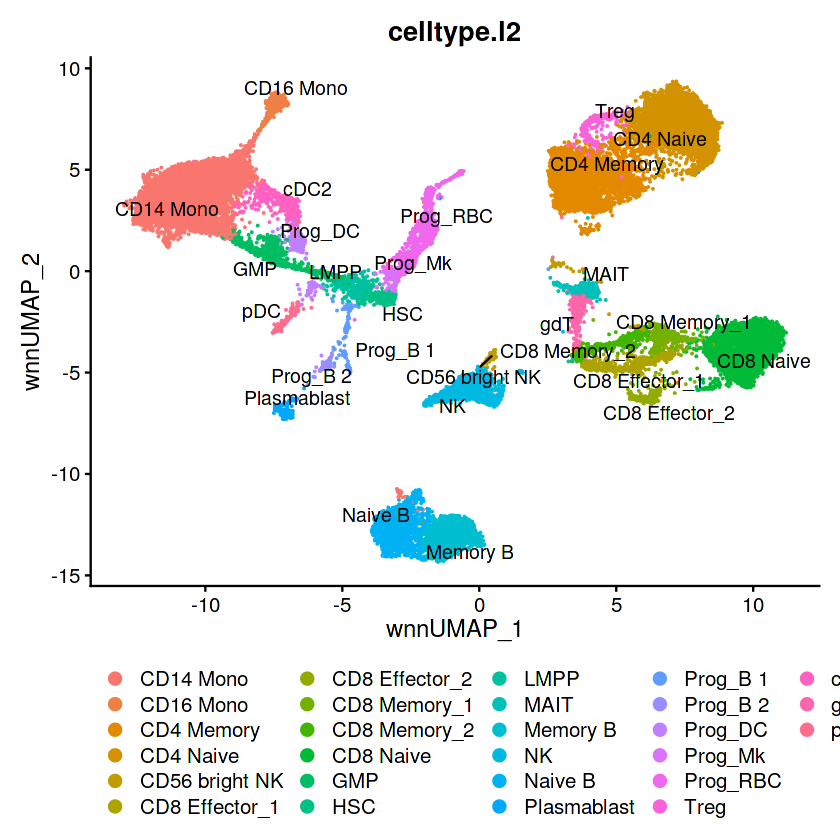

In [72]:
reference_plot + scale_fill_continuous(guide = guide_legend()) +
    theme(legend.position="bottom")
ggsave(paste(figures_dir,"reference_label_transfer.png", sep=''))


## export gene activity matrix for marker gene baased annottaion

In [73]:
write.csv(as.data.frame(gene.activities), paste(results_dir,"BMMC_atac_gene_activities.csv", sep=''))

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.7 GiB"


In [74]:
write.csv(bmmc.atac@meta.data, paste(results_dir,"bmmc_atac_metaData_w_predictions.csv",sep=''))

save.image(paste(results_dir , "WS/completed.RData", sep=''))

In [75]:
saveRDS(bmmc.atac , paste(results_dir ,"WS/bmmc_atac", sep=''))    